#  第五讲 无标度网络【实践】三

In [ ]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常
# 关注B站和公众号：单哥的科研日常，获取更多讲解教程

### 实验环境：
### Python版本==3.9.6, networkx==2.6.3, matplotlib==3.5.2, numpy==1.23.1

## 1、精确地绘制幂律分布（见书籍进阶阅读3.B）

In [29]:
# 导入库
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import powerlaw

In [30]:
# internet网络
edges = [tuple(line) for line in np.loadtxt("internet.txt")]
G1 = nx.Graph()
G1.add_edges_from(edges)

degree_seq1 = [G1.degree(i) for i in G1.nodes()]

<AxesSubplot:>

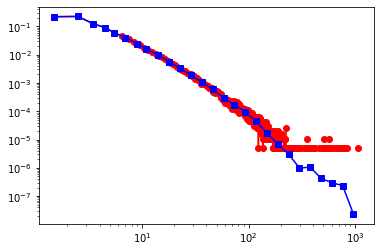

In [31]:
# 对数坐标，线性分箱
powerlaw.plot_pdf(degree_seq1, linear_bins = True, color = 'r', marker='o')
# 对数坐标，对数分箱
powerlaw.plot_pdf(degree_seq1, linear_bins = False, color = 'b', marker='s')

<AxesSubplot:>

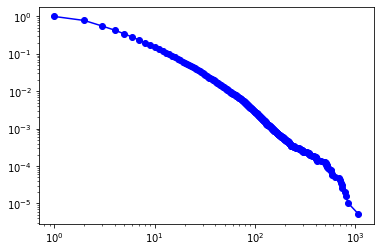

In [32]:
# 对数坐标，累积度分布
powerlaw.plot_ccdf(degree_seq1, color = 'b', marker='o')

In [33]:
# BA无标度网络
G2 = nx.barabasi_albert_graph(100000,2)
degree_seq2 = [G2.degree(i) for i in G2.nodes()]

<AxesSubplot:>

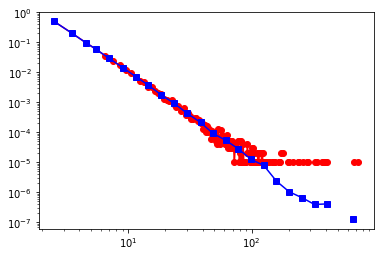

In [34]:
# 对数坐标，线性分箱
powerlaw.plot_pdf(degree_seq2, linear_bins = True, color = 'r', marker='o')
# 对数坐标，对数分箱
powerlaw.plot_pdf(degree_seq2, linear_bins = False, color = 'b', marker='s')

<AxesSubplot:>

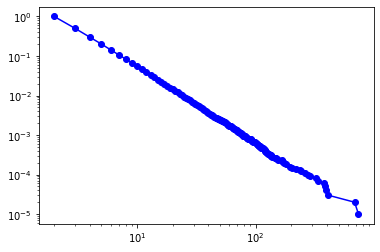

In [35]:
# 对数坐标，累积度分布
powerlaw.plot_ccdf(degree_seq2, color = 'b', marker='o')

## 2、估计度指数（见书籍进阶阅读3.C）

In [36]:
fit = powerlaw.Fit(degree_seq1)
kmin = fit.power_law.xmin
print("kmin:", kmin)
print("gamma:", fit.power_law.alpha)
print("D:", fit.power_law.D)

Calculating best minimal value for power law fit
kmin: 75.0
gamma: 3.4653996272606102
D: 0.019052157470934694


In [37]:
fit = powerlaw.Fit(degree_seq2)
kmin = fit.power_law.xmin
print("kmin:", kmin)
print("gamma:", fit.power_law.alpha)
print("D:", fit.power_law.D)

Calculating best minimal value for power law fit
kmin: 20.0
gamma: 3.0260001267394756
D: 0.018545067974010565


In [38]:
fit = powerlaw.Fit(degree_seq2, xmin = 1.0)
kmin = fit.power_law.xmin
print("kmin:", kmin)
print("gamma:", fit.power_law.alpha)
print("D:", fit.power_law.D)

kmin: 1.0
gamma: 1.8920680135859635
D: 0.46115883089539333


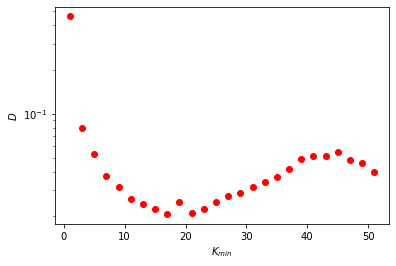

In [39]:
D_list = []
for x in np.linspace(1,51,26):
    fit = powerlaw.Fit(degree_seq2, xmin = x)
    D_list.append(fit.power_law.D)

plt.plot(np.linspace(1,51,26), D_list, "ro")
plt.xlabel("$K_{min}$")
plt.ylabel("$D$")
plt.yscale("log")